In [1]:
import json
import torch
import os
import numpy as np
import torch
import multiprocessing as mp
import torch
from torch.utils.data import DataLoader
%matplotlib inline
import matplotlib.pyplot as plt
from dnaDataloader import expermentDataloader
from dnaDataloader import addData
from dnaModelUtil import test
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
cpu = torch.device("cpu")
batch_size = 25
device

device(type='cuda', index=1)

In [2]:
try:
   mp.set_start_method('spawn')
except RuntimeError:
   pass # throws error if run twice without resetting the kernal, if its already set we dont care that this errors

In [3]:
with open("./Models/smallTrain/results.json", 'r') as file:
    results = file.read()
results = json.loads(results)
results

{'1800_nM_AR_out': {'path': './Models/smallTrain/1800_nM_AR_out_18.05.2023_19-06-36-514609.pt',
  'acc': 0.5187074829931972},
 '800_nM_AR_out': {'path': './Models/smallTrain/800_nM_AR_out_18.05.2023_19-05-05-833757.pt',
  'acc': 0.5037878787878788},
 '1200_nM_AR_out': {'path': './Models/smallTrain/1200_nM_AR_out_18.05.2023_19-08-16-547786.pt',
  'acc': 0.4311740890688259},
 '400_nM_AR_out': {'path': './Models/smallTrain/400_nM_AR_out_18.05.2023_18-55-26-306588.pt',
  'acc': 0.423728813559322},
 '50_nM_AR_out': {'path': './Models/smallTrain/50_nM_AR_out_18.05.2023_19-16-23-481818.pt',
  'acc': 0.7647058823529411},
 '100_nM_AR_out': {'path': './Models/smallTrain/100_nM_AR_out_18.05.2023_19-14-21-900832.pt',
  'acc': 0.6381909547738693}}

In [4]:
folders = [d[0] for d in os.walk("/home/khood/GitHub/SNN-DNA-project/Prepocessing/sorted")][1:] # remove first one is it is "/home/khood/GitHub/SNN-DNA-project/Prepocessing/sorted"
len(folders)

6

In [5]:
datasets = []
featIn = 0
for d in folders:
    data = expermentDataloader(
        f"{d}/index.csv",
        f"{d}", 
    )
    rawData = [d for d in data]
    featIn = len(rawData[0][0])
    trainValidData = []
    testData = []
    addData(testData, trainValidData, rawData, rhsSize=300)


    np.random.shuffle(trainValidData)
    trainData = []
    validData = []
    addData(trainData, validData, trainValidData, rhsSize=int(len(trainValidData)*(1/3)))

    datasets.append({"name": f"{os.path.basename(d)}", 
                     "train":DataLoader(trainData, batch_size=batch_size, shuffle=True) , 
                     "valid":DataLoader(validData, batch_size=batch_size, shuffle=True) , 
                     "test":DataLoader(testData, batch_size=len(testData), shuffle=True) ,
                     "model": {}}
                    )

In [6]:
for d in datasets:
    print(f"-- {d['name']} --")
    print(f"train: {len(d['train'])}")
    print(f"valid: {len(d['valid'])}")
    print(f"test : {len(d['test'])}")

-- 1800_nM_AR_out --
train: 8
valid: 4
test : 1
-- 800_nM_AR_out --
train: 8
valid: 4
test : 1
-- 1200_nM_AR_out --
train: 8
valid: 4
test : 1
-- 400_nM_AR_out --
train: 8
valid: 4
test : 1
-- 50_nM_AR_out --
train: 8
valid: 4
test : 1
-- 100_nM_AR_out --
train: 8
valid: 4
test : 1


In [7]:
manager = mp.Manager()
return_dict = manager.dict()

In [8]:
processes = []
devices = [torch.device("cuda:0"),torch.device("cuda:1"),torch.device("cuda:2"),torch.device("cuda:3")]
epochs = 1
error_margin = 20
for d in datasets:
    processes.append(mp.Process(target=test, args=(d["test"], results[d["name"]]["path"], d["name"], featIn, return_dict, epochs, error_margin, devices[0])))
    devices.append(devices.pop(0))
    
processes

[<Process name='Process-2' parent=1520908 initial>,
 <Process name='Process-3' parent=1520908 initial>,
 <Process name='Process-4' parent=1520908 initial>,
 <Process name='Process-5' parent=1520908 initial>,
 <Process name='Process-6' parent=1520908 initial>,
 <Process name='Process-7' parent=1520908 initial>]

In [9]:
print(f"{return_dict}")

{}


In [10]:
processesList = list(range(len(processes)))

while processesList:
    run = processesList[:4]
    processesList = processesList[4:]
    for i in run:
        processes[i].start()
    for i in run:
        processes[i].join()
        processes[i].terminate()
print(return_dict)

test...
test...
test...
test...
test...
test...
{'1800_nM_AR_out': {'outputPlot': array([[ 71.87663 ],
       [ 59.25211 ],
       [ 56.09372 ],
       [ 65.100716],
       [ 65.12397 ],
       [ 51.749184],
       [ 51.749184],
       [119.01918 ],
       [ 51.749184],
       [ 56.009552],
       [ 51.749184],
       [ 78.50351 ],
       [ 51.749184],
       [279.04816 ],
       [ 63.132782],
       [ 51.749184],
       [ 51.937122],
       [ 55.74279 ],
       [ 51.749184],
       [ 51.749184],
       [ 51.749184],
       [ 63.571053],
       [ 54.88376 ],
       [ 57.5737  ],
       [ 51.749184],
       [ 43.651337],
       [ 52.29536 ],
       [ 51.749184],
       [ 51.749184],
       [ 51.749184],
       [ 63.952667],
       [ 51.749184],
       [ 54.373867],
       [ 51.749184],
       [ 51.749184],
       [ 51.749184],
       [ 91.01027 ],
       [ 51.749184],
       [ 50.20848 ],
       [ 54.21522 ],
       [ 59.171124],
       [ 98.000145],
       [ 96.88242 ],
       [ 54.427

In [11]:
print(f"{return_dict}")

{'1800_nM_AR_out': {'outputPlot': array([[ 71.87663 ],
       [ 59.25211 ],
       [ 56.09372 ],
       [ 65.100716],
       [ 65.12397 ],
       [ 51.749184],
       [ 51.749184],
       [119.01918 ],
       [ 51.749184],
       [ 56.009552],
       [ 51.749184],
       [ 78.50351 ],
       [ 51.749184],
       [279.04816 ],
       [ 63.132782],
       [ 51.749184],
       [ 51.937122],
       [ 55.74279 ],
       [ 51.749184],
       [ 51.749184],
       [ 51.749184],
       [ 63.571053],
       [ 54.88376 ],
       [ 57.5737  ],
       [ 51.749184],
       [ 43.651337],
       [ 52.29536 ],
       [ 51.749184],
       [ 51.749184],
       [ 51.749184],
       [ 63.952667],
       [ 51.749184],
       [ 54.373867],
       [ 51.749184],
       [ 51.749184],
       [ 51.749184],
       [ 91.01027 ],
       [ 51.749184],
       [ 50.20848 ],
       [ 54.21522 ],
       [ 59.171124],
       [ 98.000145],
       [ 96.88242 ],
       [ 54.42704 ],
       [ 51.749184],
       [ 51.749184],


In [12]:
len(return_dict["1800_nM_AR_out"]["outputPlot"])
len(return_dict["1800_nM_AR_out"]["targetPlot"])

588

In [13]:
defultePlotSize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [20, 5]

In [16]:
return_dict.keys()

['1800_nM_AR_out',
 '800_nM_AR_out',
 '1200_nM_AR_out',
 '400_nM_AR_out',
 '50_nM_AR_out',
 '100_nM_AR_out']

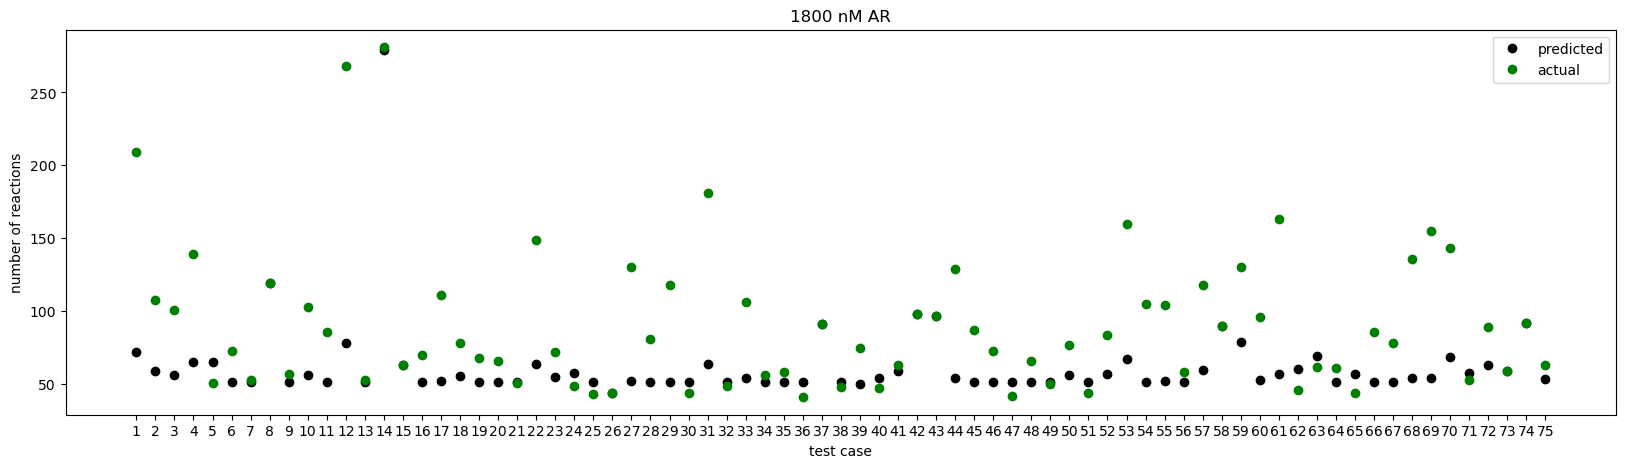

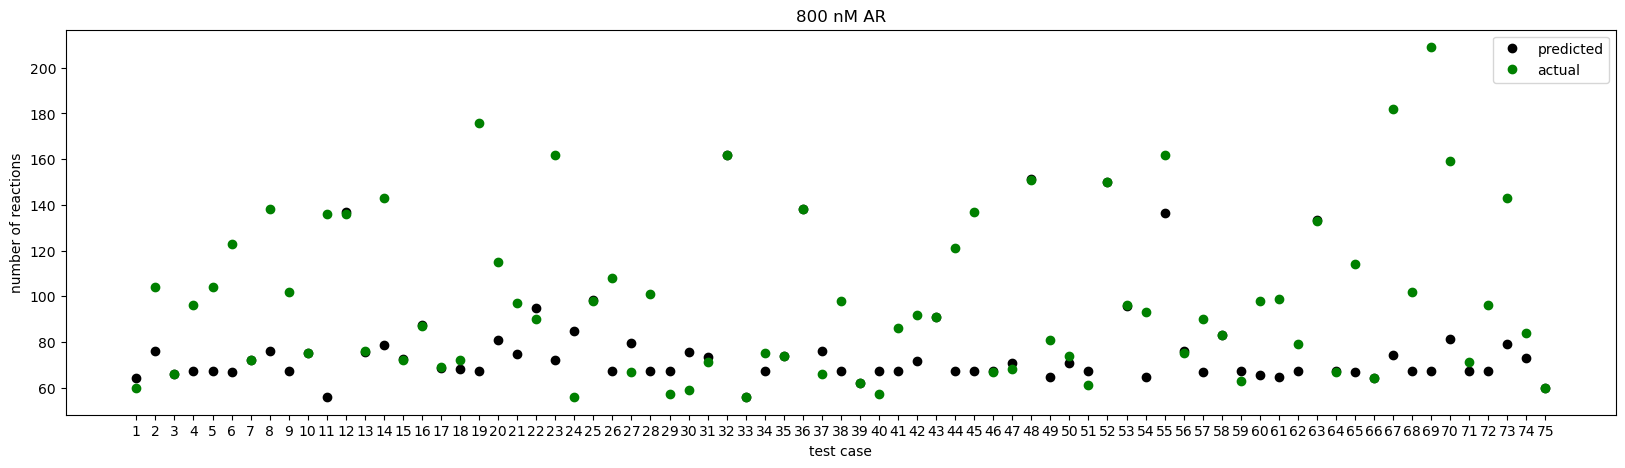

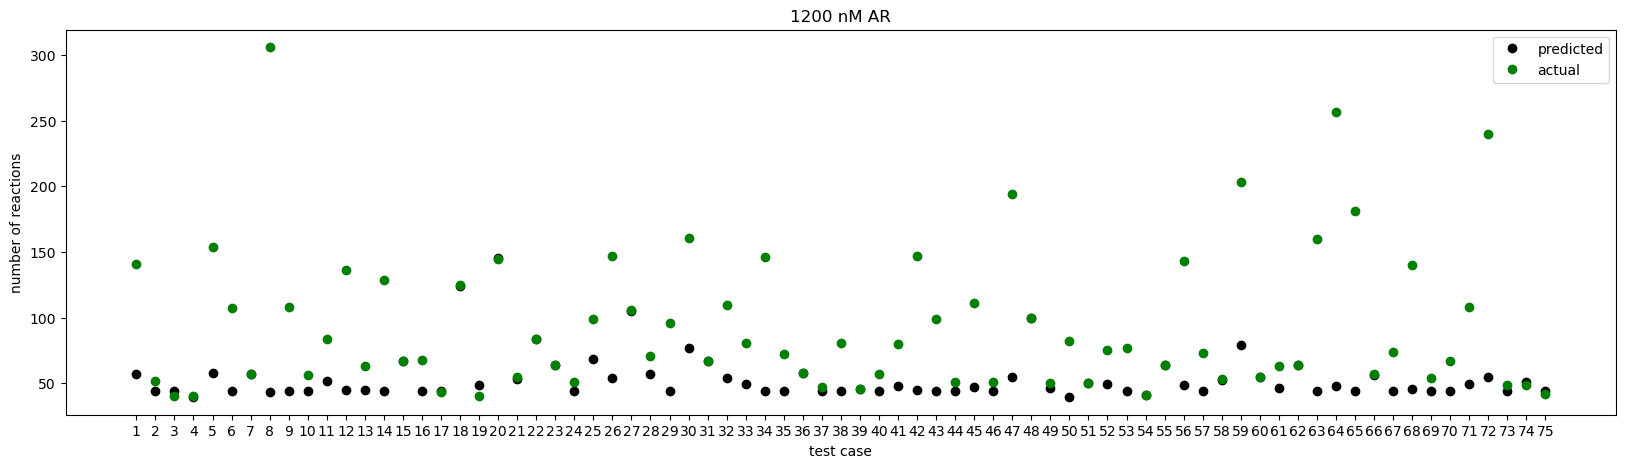

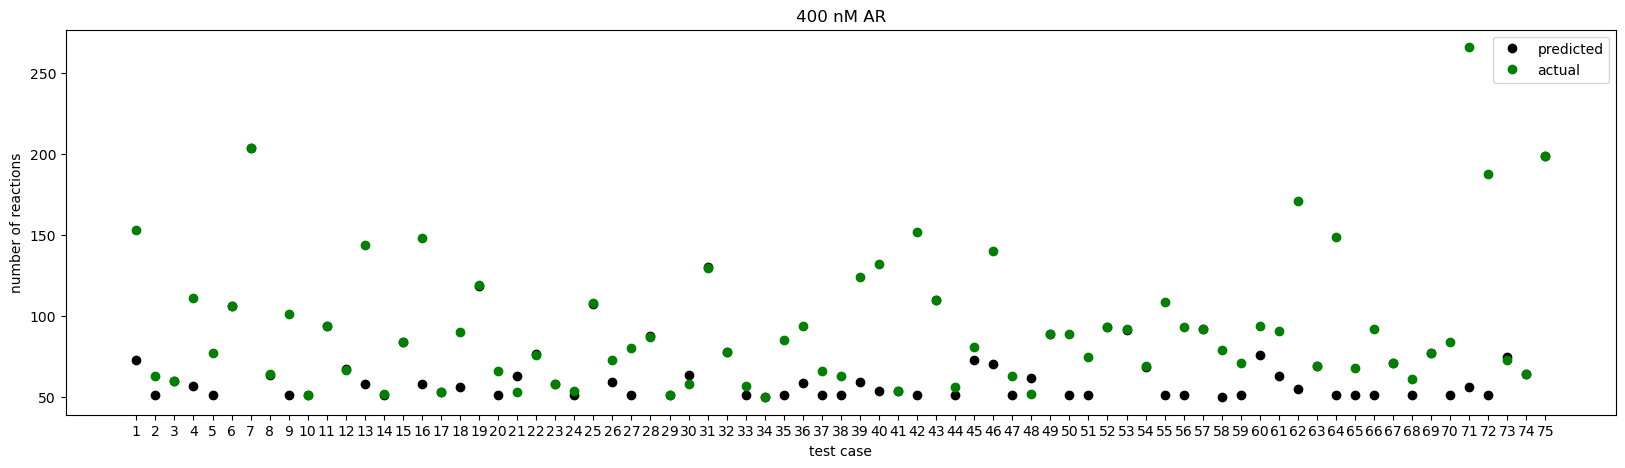

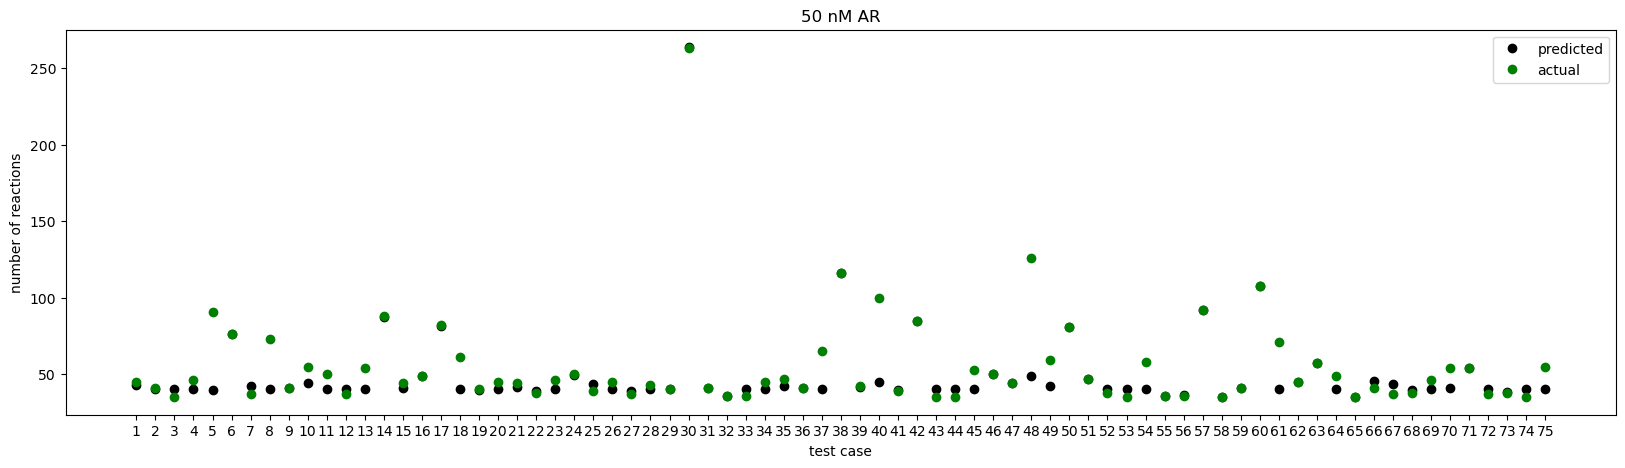

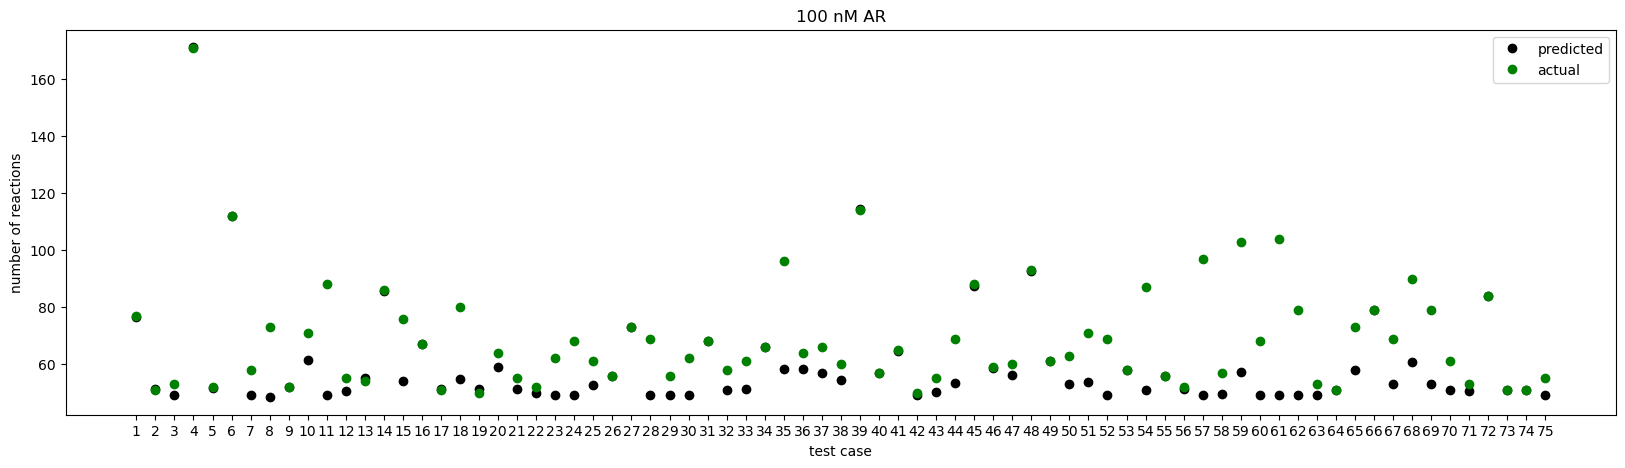

In [19]:
for k in return_dict.keys():
    outputPlot = return_dict[k]["outputPlot"][:75]
    targetPlot = return_dict[k]["targetPlot"][:75]
    x_marks = [i + 1 for i in list(range(len(outputPlot)))]
    plt.plot(x_marks, outputPlot, 'o', color='black', label="predicted")
    plt.plot(x_marks, targetPlot, 'o', color='green', label="actual")
    plt.xticks(ticks=x_marks, labels=x_marks)
    plt.xlabel('test case')
    plt.ylabel('number of reactions')
    title = k.split("_")
    title.pop()
    title = ' '.join(title)
    plt.title(f"{title}")
    plt.legend(loc='upper right')
    plt.show()